#### Capture Images:
* Use this Notebook to grab images from AirSim
* Images are Saved into the Note book folder.
* Copy the saved images to camera_cal folder
* Name the files calibration1.png, calibration2.png, calibration3.png and so on


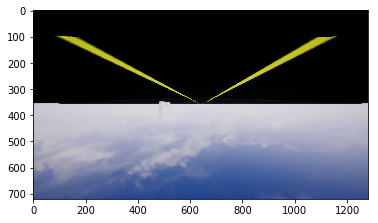

1280  x  720


In [34]:
from AirSimClient import *
client = CarClient()
client.confirmConnection()
client.enableApiControl(True)
car_controls = CarControls()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

responses = client.simGetImages([ImageRequest(0, AirSimImageType.Scene, False, False)])
response = responses[0]

# get numpy array
img1d = np.frombuffer(response.image_data_uint8, dtype=np.uint8) 

# reshape array to 4 channel image array H X W X 4
img_rgba = np.flipud(img1d.reshape(response.height, response.width, 4)) 

imgplot = plt.imshow(img_rgba)
plt.show()

client.write_png(os.path.normpath('calibration.png'), img_rgba) 

print(response.width, " x " , response.height)

client.enableApiControl(False)